# APEX analysis
- Investigate ancestry PCA 
- kinship estimation
- compare eGene discovery with FastQTL OLS
- compare apex cis-lmm and cis-lmm with dTSS weight
- trans results

In [1]:
library(ggplot2)
library(dplyr)
library(data.table)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
setwd("~/project-gandalm/isoform_twas/apex/")

### 1: Investigate related subjects
These are the subjects with plink pi_hat > 0.9. See `IDB.ipynb`.

In [18]:
# load pcrelate 
load("data/geno/mixed_pcrelate.RData")
pcrelobj$kinBtwn %>% filter(kin > .353) # threshold: 2^(-3/2)

ID1,ID2,kin,k0,k2,nsnp
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Br1779,Br1794,0.4773030,0.0007402673,0.8811462,585357
Br2412,HSB100,0.4817147,0.0038922216,0.8649873,624471
Br2394,HSB148,0.5073303,0.0040027312,0.9445593,509630
Br2402,HSB107,0.4916172,0.0075964241,0.9197613,527140
Br2411,HSB154,0.4819519,0.0039021024,0.8186030,777673


### 2: ancestry PCA
** Genotype batch is probably due to HDBR plink --mind 0.30 **

In [1]:
objname <- load("data/geno/mixed_pcair.RData")

In [57]:
pca <- get(objname)

In [58]:
pcs <- as.data.frame(pca$vectors[pca$unrels,])
n <- ncol(pcs)
names(pcs) <- paste0("PC", 1:n)
pcs$sample.id <- row.names(pcs)

In [60]:
dim(pcs)

[1] 647  33

In [10]:
head(pcs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,sample.id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1474,-0.01758365,-0.05985132,0.0057865492,0.05829920,-0.0058798298,0.0005627591,-0.0023709462,-0.0005187626,4.741017e-04,-0.0008160070,⋯,0.0027344502,-0.0023831929,0.0001292343,0.0025268857,0.0026597171,0.0011395621,0.0011470737,0.0008155334,-0.0020701493,1474
1513,-0.01754453,-0.05045746,0.0092390071,0.04463412,-0.0007710533,-0.0001502877,-0.0004321746,0.0022384281,5.138133e-06,-0.0006213944,⋯,0.0016730197,0.0031489292,-0.0016329266,0.0000218521,0.0008596059,0.0014448646,0.0025350431,0.0002337937,0.0012812631,1513
1677,-0.02080681,-0.06942687,0.0024142367,0.06419512,-0.0053404102,-0.0006455763,-0.0005583008,0.0003731577,-1.312245e-03,0.0016763942,⋯,0.0018065235,0.0006542497,-0.0030148240,0.0002101639,0.0020680190,0.0007026484,0.0022417236,-0.0009235367,-0.0010923137,1677
1680,-0.01758468,-0.06145110,0.0032589936,0.05204016,-0.0042006806,-0.0012024317,0.0023755014,-0.0031731501,-9.267568e-05,-0.0015613427,⋯,-0.0001886959,-0.0006288909,-0.0006917647,-0.0009110829,-0.0004630154,0.0001213840,-0.0014111097,0.0011566101,-0.0030967189,1680
1681,-0.01944152,-0.04836405,0.0110410679,0.04726286,-0.0004476830,0.0017890418,-0.0021040515,-0.0003309741,-1.269535e-03,0.0011052204,⋯,-0.0029108295,0.0008713060,-0.0036596861,-0.0024426203,0.0013156592,-0.0033148579,0.0016808697,-0.0010506094,-0.0004503999,1681
1699,-0.01192897,-0.06549176,0.0007918142,0.06303621,-0.0041734755,-0.0000635649,0.0025154798,-0.0020216203,6.210432e-04,-0.0013958559,⋯,0.0025961790,0.0032962577,0.0001379395,0.0030789156,0.0028480970,-0.0009964315,-0.0008877369,-0.0001410705,0.0019601790,1699


In [61]:
objname2 <- load("data/mixed_dummy_annot.RData")

In [62]:
annot <- get(objname2)

In [13]:
head(annot)

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which,

An object of class 'AnnotatedDataFrame'
  rowNames: 1 2 ... 6 (6 total)
  varLabels: sample.id ethnicity
  varMetadata: labelDescription

In [63]:
annot <- pData(annot) %>% select("sample.id", "ethnicity")

In [64]:
pcs <- left_join(pcs, annot, by="sample.id")

In [65]:
dim(pcs)

[1] 647  34

In [17]:
head(pcs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,sample.id,ethnicity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,-0.01758365,-0.05985132,0.0057865492,0.05829920,-0.0058798298,0.0005627591,-0.0023709462,-0.0005187626,4.741017e-04,-0.0008160070,⋯,-0.0023831929,0.0001292343,0.0025268857,0.0026597171,0.0011395621,0.0011470737,0.0008155334,-0.0020701493,1474,amr
2,-0.01754453,-0.05045746,0.0092390071,0.04463412,-0.0007710533,-0.0001502877,-0.0004321746,0.0022384281,5.138133e-06,-0.0006213944,⋯,0.0031489292,-0.0016329266,0.0000218521,0.0008596059,0.0014448646,0.0025350431,0.0002337937,0.0012812631,1513,amr
3,-0.02080681,-0.06942687,0.0024142367,0.06419512,-0.0053404102,-0.0006455763,-0.0005583008,0.0003731577,-1.312245e-03,0.0016763942,⋯,0.0006542497,-0.0030148240,0.0002101639,0.0020680190,0.0007026484,0.0022417236,-0.0009235367,-0.0010923137,1677,amr
4,-0.01758468,-0.06145110,0.0032589936,0.05204016,-0.0042006806,-0.0012024317,0.0023755014,-0.0031731501,-9.267568e-05,-0.0015613427,⋯,-0.0006288909,-0.0006917647,-0.0009110829,-0.0004630154,0.0001213840,-0.0014111097,0.0011566101,-0.0030967189,1680,amr
5,-0.01944152,-0.04836405,0.0110410679,0.04726286,-0.0004476830,0.0017890418,-0.0021040515,-0.0003309741,-1.269535e-03,0.0011052204,⋯,0.0008713060,-0.0036596861,-0.0024426203,0.0013156592,-0.0033148579,0.0016808697,-0.0010506094,-0.0004503999,1681,amr
6,-0.01192897,-0.06549176,0.0007918142,0.06303621,-0.0041734755,-0.0000635649,0.0025154798,-0.0020216203,6.210432e-04,-0.0013958559,⋯,0.0032962577,0.0001379395,0.0030789156,0.0028480970,-0.0009964315,-0.0008877369,-0.0001410705,0.0019601790,1699,amr


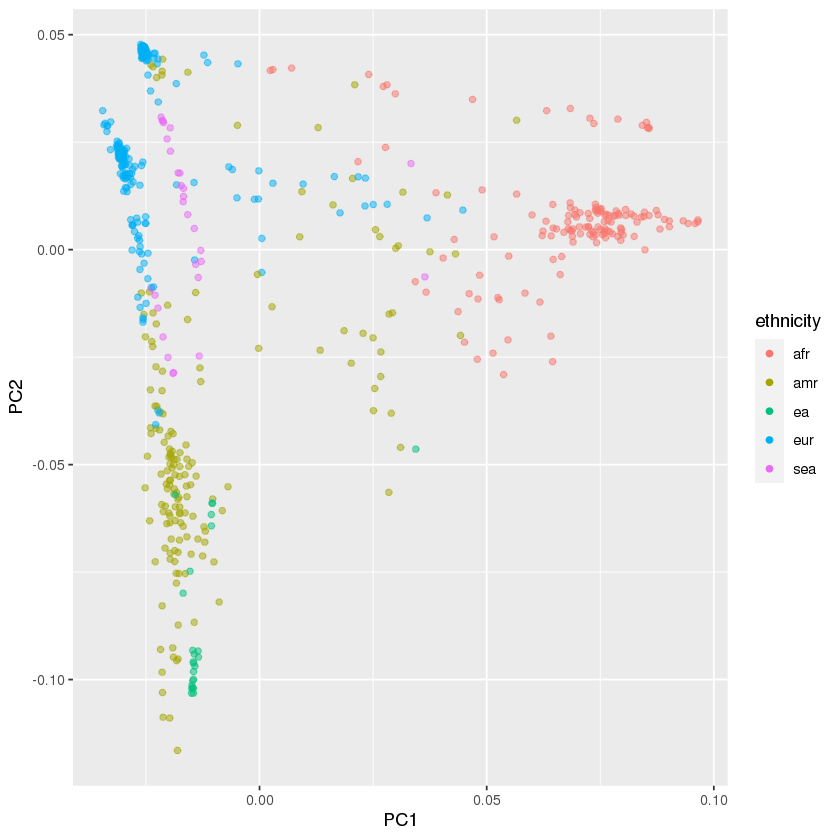

In [21]:
p <- ggplot(pcs, aes_string("PC1", "PC2", color="ethnicity")) + geom_point(alpha=0.5) +
    guides(colour=guide_legend(override.aes=list(alpha=1)))
p

** Is this due to sex? No. **

In [66]:
meta <- read.table("./../eqtl_new/metadata_inferSex.tsv", header = T, stringsAsFactors = F)

In [23]:
head(meta)

,Subject,Age,Sex,inferSex
,<chr>,<dbl>,<chr>,<chr>
1,HSB100,-0.4027397,F,F
2,HSB152,-0.4602740,M,M
3,HSB195,-0.4219178,M,M
4,HSB221,-0.4027397,F,F
5,HSB222,-0.4823288,F,F
6,HSB238,-0.4794521,F,F


In [67]:
pcs <- left_join(pcs, meta, by=c("sample.id"="Subject"))

In [68]:
dim(pcs)

[1] 647  37

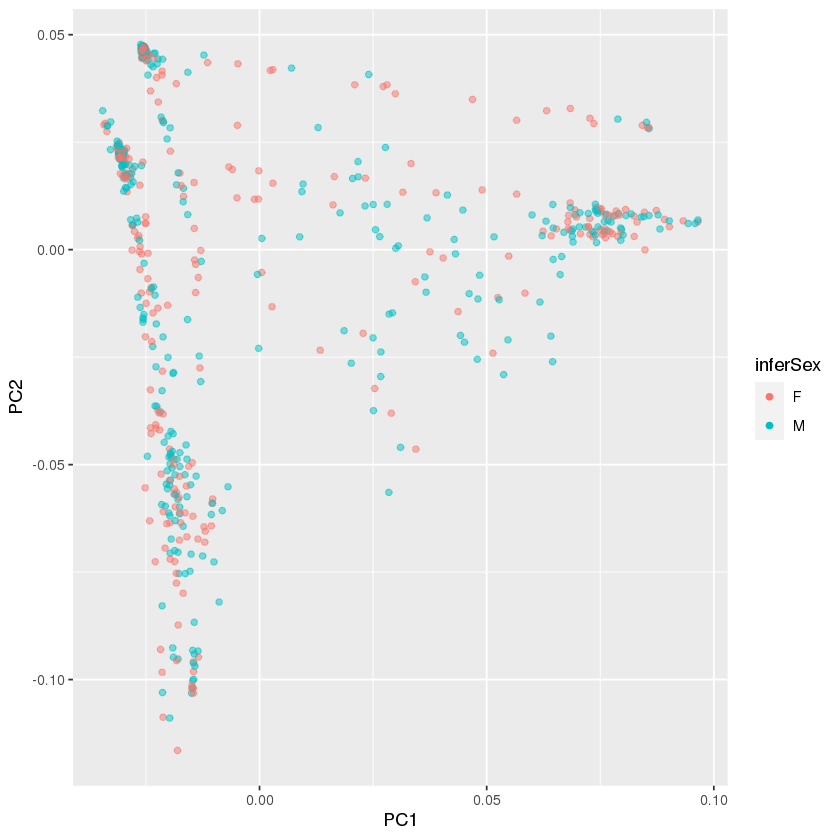

In [25]:
p1 <- ggplot(pcs, aes_string("PC1", "PC2", color="inferSex")) + geom_point(alpha=0.5) +
    guides(colour=guide_legend(override.aes=list(alpha=1)))
p1

** Now check study **

In [69]:
walker <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_walker.txt", header = F, stringsAsFactors = F)
obrien <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_obrien.txt", header = F, stringsAsFactors = F)
werling <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_werling.txt", header = F, stringsAsFactors = F)
libd <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_libd.txt", header = F, stringsAsFactors = F)
hdbr <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_hdbr.txt", header = F, stringsAsFactors = F)

In [71]:
pcs$Study <- NA
for(i in 1:nrow(pcs)) {
    if(pcs[i, "sample.id"] %in% walker[,1]) {pcs[i, "Study"] <- "Walker"}
    if(pcs[i, "sample.id"] %in% obrien[,1]) {pcs[i, "Study"] <- "Obrien"}
    if(pcs[i, "sample.id"] %in% werling[,1]) {pcs[i, "Study"] <- "Werling"}
    if(pcs[i, "sample.id"] %in% libd[,1]) {pcs[i, "Study"] <- "LIBD"}
    if(pcs[i, "sample.id"] %in% hdbr[,1]) {pcs[i, "Study"] <- "HDBR"}
}

In [72]:
head(pcs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC29,PC30,PC31,PC32,sample.id,ethnicity,Age,Sex,inferSex,Study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,-0.01758365,-0.05985132,0.0057865492,0.05829920,-0.0058798298,0.0005627591,-0.0023709462,-0.0005187626,4.741017e-04,-0.0008160070,⋯,0.0011395621,0.0011470737,0.0008155334,-0.0020701493,1474,amr,-0.4986301,M,M,Walker
2,-0.01754453,-0.05045746,0.0092390071,0.04463412,-0.0007710533,-0.0001502877,-0.0004321746,0.0022384281,5.138133e-06,-0.0006213944,⋯,0.0014448646,0.0025350431,0.0002337937,0.0012812631,1513,amr,-0.4602740,M,M,Walker
3,-0.02080681,-0.06942687,0.0024142367,0.06419512,-0.0053404102,-0.0006455763,-0.0005583008,0.0003731577,-1.312245e-03,0.0016763942,⋯,0.0007026484,0.0022417236,-0.0009235367,-0.0010923137,1677,amr,-0.4794521,F,F,Walker
4,-0.01758468,-0.06145110,0.0032589936,0.05204016,-0.0042006806,-0.0012024317,0.0023755014,-0.0031731501,-9.267568e-05,-0.0015613427,⋯,0.0001213840,-0.0014111097,0.0011566101,-0.0030967189,1680,amr,-0.4698630,M,M,Walker
5,-0.01944152,-0.04836405,0.0110410679,0.04726286,-0.0004476830,0.0017890418,-0.0021040515,-0.0003309741,-1.269535e-03,0.0011052204,⋯,-0.0033148579,0.0016808697,-0.0010506094,-0.0004503999,1681,amr,-0.4602740,M,M,Walker
6,-0.01192897,-0.06549176,0.0007918142,0.06303621,-0.0041734755,-0.0000635649,0.0025154798,-0.0020216203,6.210432e-04,-0.0013958559,⋯,-0.0009964315,-0.0008877369,-0.0001410705,0.0019601790,1699,amr,-0.4602740,NA,F,Walker


In [73]:
table(pcs$Study)


   HDBR    LIBD  Obrien  Walker Werling 
    162      39     120     210     116 

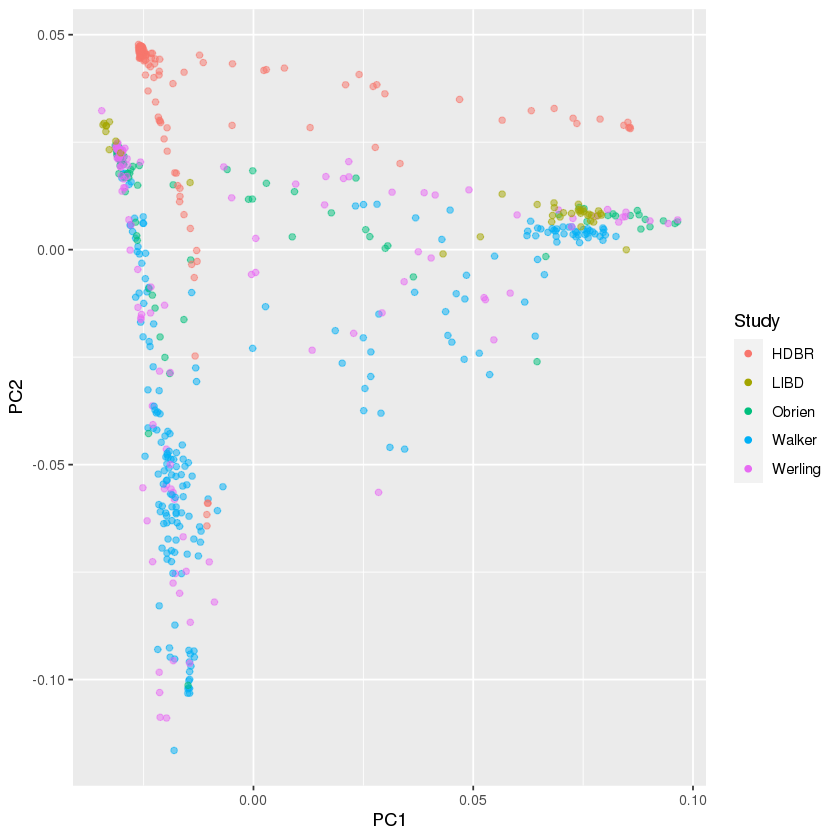

In [74]:
p2 <- ggplot(pcs, aes_string("PC1", "PC2", color="Study")) + geom_point(alpha=0.5) +
    guides(colour=guide_legend(override.aes=list(alpha=1)))
p2

### 3: Kinship estimation
- GRM from `mixed_pcrelate_Matrix.RData` contain diagonal entries, but why some are low?
- Kinship from `pcrelobj$kinBtwn` does not contain diagonal entries. 

In [3]:
load("data/geno/mixed_pcrelate_Matrix.RData")

In [8]:
kin <- rep(NA, 654)
for (i in c(1:654)) {
    kin[i] <- km[i,i]
}

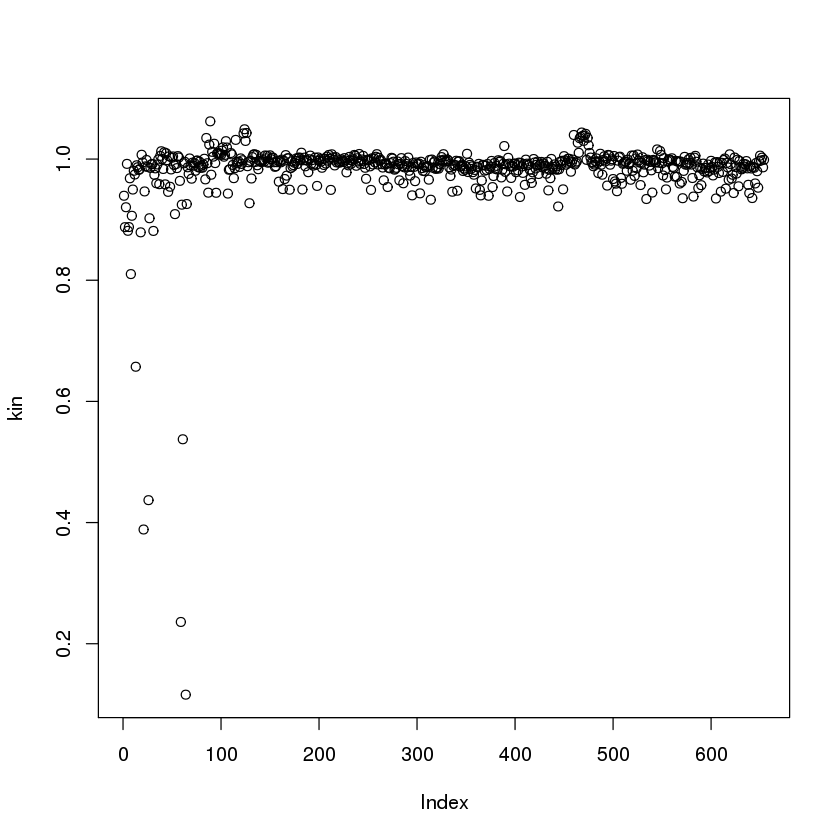

In [9]:
plot(kin)

In [10]:
which(kin < 0.8)

[1] 13 21 26 59 61 64

In [12]:
grm <- read.table("data/geno/mixed_pcrelate_grm.txt", header = T, stringsAsFactors = F)
head(grm)

,id1,id2,kinship
,<chr>,<chr>,<dbl>
1,11305,11305,0.9394609
2,11318,11318,0.8876355
3,11395,11395,0.9204885
4,11402,11402,0.9920662
5,11469,11469,0.8815847
6,11513,11513,0.8877781


In [14]:
grm %>% filter(id1 == id2, kinship < 0.8)

id1,id2,kinship
<chr>,<chr>,<dbl>
12545,12545,0.6572249
16859,16859,0.3885663
17221,17221,0.4370107
HSB265,HSB265,0.2359390
HSB416,HSB416,0.5374989
HSB545,HSB545,0.1159374


In [15]:
kin <- read.table("data/geno/mixed_pcrelate_kin.txt", header = T, stringsAsFactors = F)
head(kin)

,ID1,ID2,kin
,<chr>,<chr>,<dbl>
1,HSB265,HSB416,0.03578174
2,HSB265,HSB634,0.08324783
3,HSB265,HSB643,0.03363942
4,HSB265,HSB653,0.01396523
5,HSB265,HSB676,0.01806682
6,HSB265,HSB679,0.05193837


In [20]:
head(pcrelobj$kinBtwn)

ID1,ID2,kin,k0,k2,nsnp
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
HSB265,HSB416,0.03578174,0.6470754,-0.2097976585,280669
HSB265,HSB634,0.08324783,0.6406663,-0.0263423343,313899
HSB265,HSB643,0.03363942,0.8650756,-0.0003667490,348954
HSB265,HSB653,0.01396523,0.9478745,0.0037354092,371266
HSB265,HSB676,0.01806682,0.9285668,0.0008340338,364909
HSB265,HSB679,0.05193837,0.7847020,-0.0075444815,335805


In [22]:
head(pcrelobj$kinSelf)

ID,f,nsnp
<chr>,<dbl>,<dbl>
HSB107,0.043104590,528007
HSB148,0.049170203,509796
HSB150,0.010184832,520375
HSB152,0.002480654,522969
HSB154,-0.005215525,777681
HSB194,-0.005036950,525988


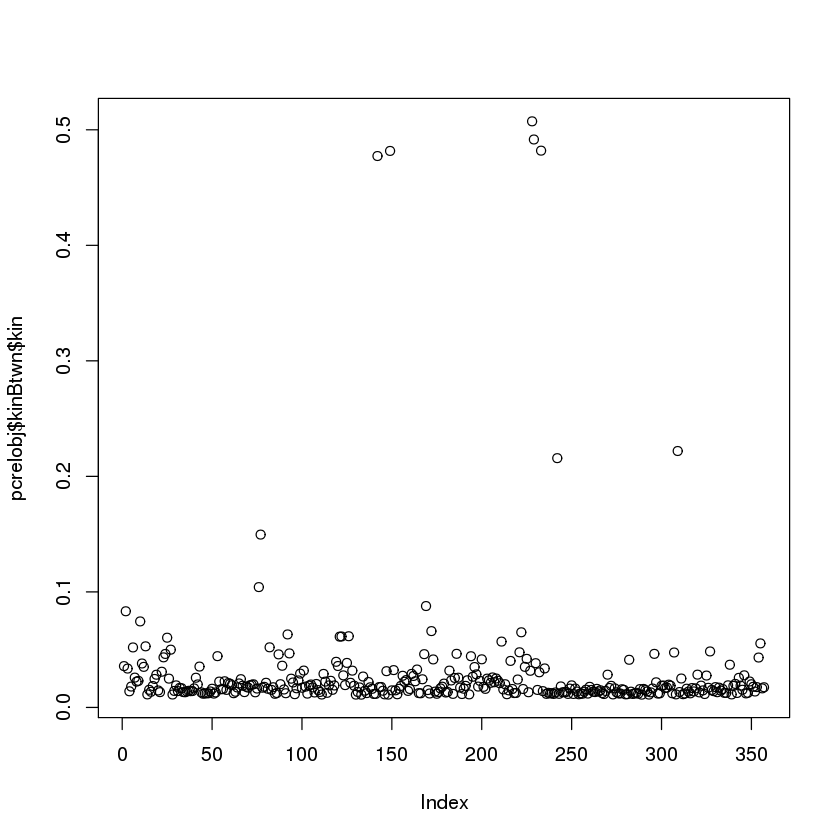

In [10]:
plot(pcrelobj$kinBtwn$kin)

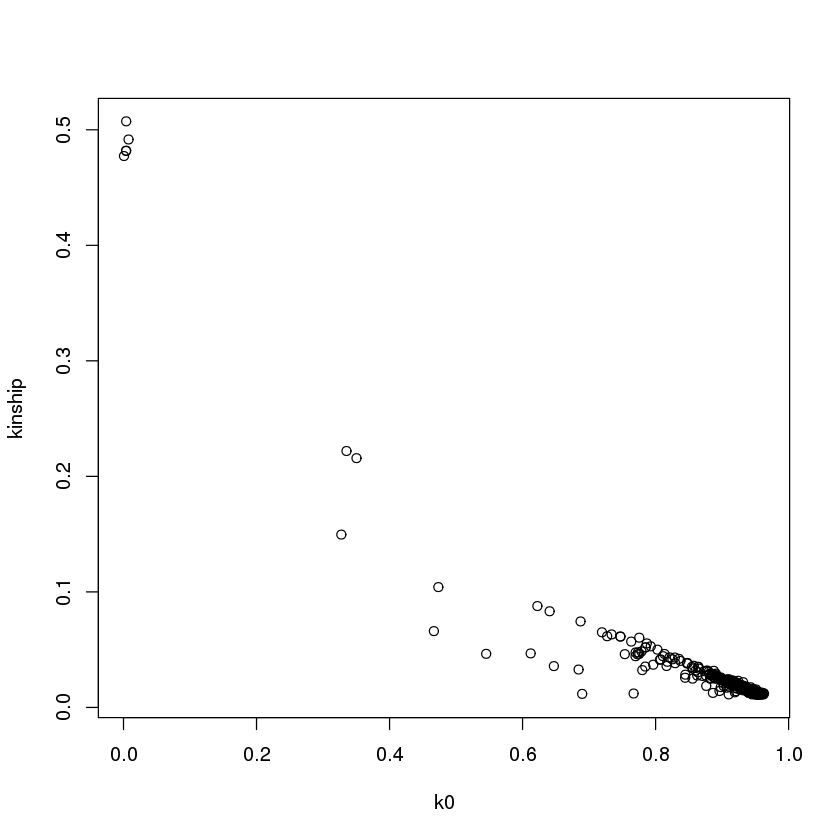

In [23]:
plot(pcrelobj$kinBtwn$k0, pcrelobj$kinBtwn$kin, xlab="k0", ylab="kinship")

### 4: compare: FastQTL OLS, apex OLS, apex cis-lmm and cis-lmm-dtss with kin and grm

In [24]:
library(qvalue)

In [28]:
# # apex cis lmm with kin
# df <- data.frame()
# for (i in 1:10){
#     num = i*10
#     dat <- fread(paste0("~/project-gandalm/isoform_twas/apex/output/mixed_gene_cis_lmm_kin/", num, "hcp.cis_gene_table.txt.gz"), data.table=F)
#     print(sum(complete.cases(dat)))
#     Q <- qvalue(dat[,"egene_pval"])
#     dat$qvalue <- signif(Q$qvalues,6)
#     df[i,1] <- sum(dat$qval < 0.05)
# }
# # apex cis lmm weighted by dTSS with kin
# df_dtss <- data.frame()
# for (i in 1:10){
#     num = i*10
#     dat <- fread(paste0("~/project-gandalm/isoform_twas/apex/output/mixed_gene_cis_lmm_kin/", num, "hcp_dtss.cis_gene_table.txt.gz"), data.table=F)
#     print(sum(complete.cases(dat)))
#     Q <- qvalue(dat[,"egene_pval"])
#     dat$qvalue <- signif(Q$qvalues,6)
#     df_dtss[i,1] <- sum(dat$qval < 0.05)
# }
# apex cis OLS
df_ols <- data.frame()
for (i in 1:100){
#     num = i*10
    dat <- fread(paste0("output/mixed_gene_cis_ols/", i, "factor.cis_gene_table.txt.gz"), data.table=F)
#     if(sum(complete.cases(dat)) != 31492) {
#         print(i)
#     }
    Q <- qvalue(dat[,"egene_pval"])
    dat$qvalue <- signif(Q$qvalues,6)
    df_ols[i,1] <- sum(dat$qval < 0.05)
}
# apex cis lmm with grm
df_grm <- data.frame()
for (i in 1:10){
    num = i*10
    dat <- fread(paste0("output/mixed_gene_cis_lmm_grm/", num, "factor.cis_gene_table.txt.gz"), data.table=F)
#     print(sum(complete.cases(dat)))
    Q <- qvalue(dat[,"egene_pval"])
    dat$qvalue <- signif(Q$qvalues,6)
    df_grm[i,1] <- sum(dat$qval < 0.05)
}
# apex cis lmm weighted by dTSS with grm
df_dtss_grm <- data.frame()
for (i in 1:10){
    num = i*10
    dat <- fread(paste0("output/mixed_gene_cis_lmm_grm_dtss/", num, "factor.cis_gene_table.txt.gz"), data.table=F)
#     print(sum(complete.cases(dat)))
    Q <- qvalue(dat[,"egene_pval"])
    dat$qvalue <- signif(Q$qvalues,6)
    df_dtss_grm[i,1] <- sum(dat$qval < 0.05)
}

In [36]:
# df_compare <- rbind(df, df_dtss, df_ols, df_grm, df_dtss_grm)
# df_compare$group <- c(rep("APEX-cis-lmm-kin", 10), rep("APEX-cis-lmm-dtss-kin", 10), rep("APEX-cis-ols", 10),
#                      rep("APEX-cis-lmm-grm", 10), rep("APEX-cis-lmm-dtss-grm", 10))
# df_compare$HCP <- c(rep(seq(10, 100, by = 10),5))

df_compare <- rbind(df_ols, df_grm, df_dtss_grm)
df_compare$group <- c(rep("APEX-cis-ols", 100),
                      rep("APEX-cis-lmm-grm", 10), 
                      rep("APEX-cis-lmm-grm-dtss", 10))
df_compare$unknown_fac <- c(1:100, rep(seq(10, 100, by = 10),2))

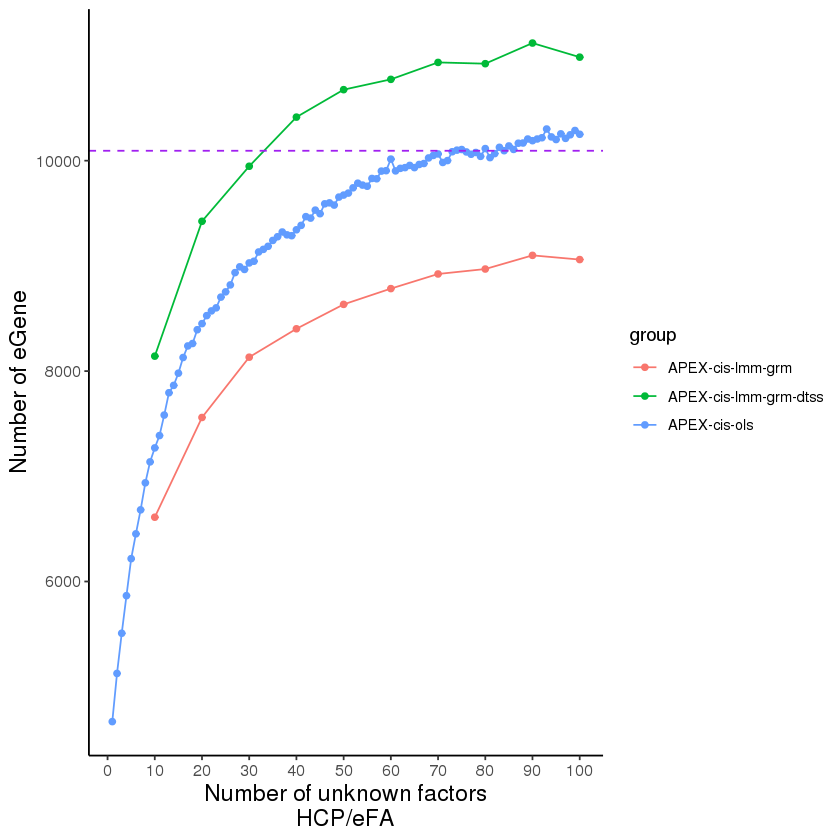

In [37]:
p <- ggplot(df_compare) +
    geom_point(aes(x=unknown_fac, y=V1, color=group))+
    geom_line(aes(x=unknown_fac, y=V1, color=group)) +
    geom_hline(yintercept = 10094, color = "purple", linetype = 2) +
    scale_x_continuous(breaks = seq(0, 110, by = 10))  +
    labs(y = "Number of eGene", 
         x = "Number of unknown factors\nHCP/eFA") +
    theme_classic() +
    theme(axis.text = element_text(size=12),
          axis.title = element_text(size=14),
          plot.title = element_text(size=16, face="bold", hjust = 0.5))
p

In [38]:
ggsave("figures/compare.png", p, height=6, width=6)

** eGene overlap **

In [39]:
fastqtl <- fread("../eqtl_new/results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)

In [40]:
length(unique(fastqtl$pid))

[1] 10094

In [44]:
apex <- fread("output/mixed_gene_cis_lmm_grm_dtss/90factor.cis_gene_table.txt.gz", data.table = F)
Q <- qvalue(apex[,"egene_pval"])
apex$qvalue <- signif(Q$qvalues,6)
apex_sig <- apex %>% filter(qvalue < 0.05)

In [45]:
head(apex_sig)

,#chrom,start,end,gene,egene_pval,n_samples,n_covar,resid_sd,n_cis_variants,qvalue
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>
1,1,133722,133723,ENSG00000238009,5.26355e-04,642,98,0.813540,1348,1.96970e-03
2,1,760517,760518,ENSG00000228794,2.68423e-03,642,98,0.452254,3133,8.62761e-03
3,1,840213,840214,ENSG00000272438,1.68383e-08,642,98,0.762438,3260,1.17299e-07
4,1,846814,846815,ENSG00000230699,6.89822e-30,642,98,0.661219,3274,2.11567e-28
5,1,901861,901862,ENSG00000187583,1.56636e-20,642,98,0.890352,3492,2.81818e-19
6,1,933430,933431,ENSG00000272512,6.05555e-20,642,98,0.605152,3655,1.05860e-18


In [46]:
length(unique(apex_sig$gene))

[1] 11118

In [47]:
sum(unique(fastqtl$pid) %in% unique(apex_sig$gene))

[1] 8960

** p-value concordance **

In [48]:
fastqtl_full <- fread("../eqtl_new/results/mixed_perm_90hcp/all.chunks.txt.gz", data.table = F)

In [49]:
colnames(fastqtl_full) <- c("pid", "nvar", "shape1", "shape2", "dummy", "sid", "dist", "npval", "slope", "ppval", "bpval")
dim(fastqtl_full)
fastqtl_full <- fastqtl_full[complete.cases(fastqtl_full),]
dim(fastqtl_full)

[1] 31947    11

[1] 31531    11

In [53]:
head(apex)

,#chrom,start,end,gene,egene_pval,n_samples,n_covar,resid_sd,n_cis_variants,qvalue
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>
1,1,11868,11869,ENSG00000223972,0.295056,642,98,0.919308,846,0.459532
2,1,29553,29554,ENSG00000243485,0.856596,642,98,0.436865,882,0.862239
3,1,29569,29570,ENSG00000227232,0.816758,642,98,0.640782,882,0.862239
4,1,36080,36081,ENSG00000237613,0.609936,642,98,0.845733,900,0.796311
5,1,91104,91105,ENSG00000239945,0.704231,642,98,0.930783,1125,0.858099
6,1,131024,131025,ENSG00000233750,0.888100,642,98,0.692308,1334,0.862239


In [54]:
df <- fastqtl_full %>% left_join(apex, by = c("pid"="gene"))
head(df)

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,#chrom,start,end,egene_pval,n_samples,n_covar,resid_sd,n_cis_variants,qvalue
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>
1,ENSG00000258162,5964,1.02038,538.928,459.946,rs7299713,565454,3.46602e-04,-0.2020930,0.35775600,3.61295e-01,12,81771820,81771821,8.53749e-01,642,98,0.562175,5964,0.862239000
2,ENSG00000258375,5726,1.03336,492.684,454.421,rs6539629,666247,3.36203e-05,0.3712650,0.04849520,5.27628e-02,12,81940228,81940229,4.69164e-02,642,98,0.298524,5726,0.101846000
3,ENSG00000139220,5622,1.05586,406.049,437.573,rs12812709,295636,2.42821e-04,-0.0786925,0.27682500,2.68812e-01,12,82153331,82153332,2.32835e-01,642,98,0.237895,5622,0.378842000
4,ENSG00000127720,5887,1.04440,612.578,458.393,rs73155422,138876,2.43598e-08,-0.2558920,0.00009999,8.63575e-05,12,82752306,82752307,3.47268e-05,642,98,0.373292,5887,0.000158593
5,ENSG00000133773,5889,1.08823,575.824,448.960,rs7306377,518023,1.98705e-03,-0.2801140,0.90099000,9.09580e-01,12,82752583,82752584,7.36285e-01,642,98,0.325906,5889,0.862239000
6,ENSG00000257875,6161,1.04663,627.381,459.299,rs74396276,-363771,6.08369e-05,-0.3506010,0.09649040,9.94606e-02,12,82862234,82862235,7.46770e-01,642,98,0.577377,6161,0.862239000


In [55]:
df <- df %>% select(pid, bpval, egene_pval)

In [56]:
dim(df)
sum(complete.cases(df))

[1] 31531     3

[1] 31492

In [57]:
df <- df[complete.cases(df),]

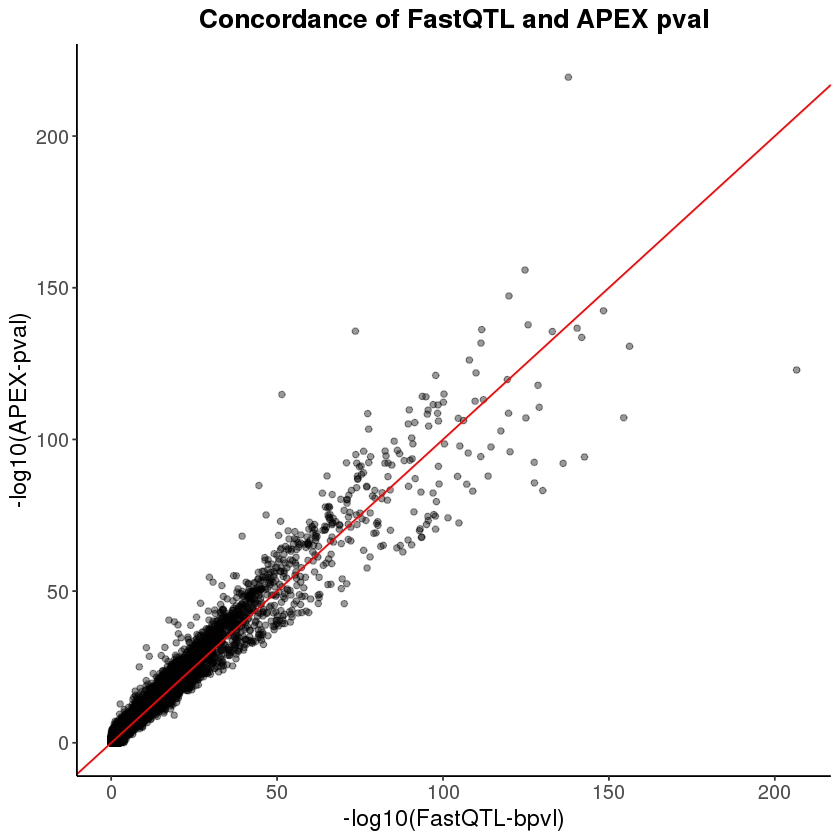

In [61]:
ggplot(df, aes(x = -log10(bpval), y = -log10(egene_pval))) +
geom_point(alpha = .4) +
geom_abline(intercept = 0, slope = 1, color = "red") +
theme_classic() +
labs(x = "-log10(FastQTL-bpvl)", y = "-log10(APEX-pval)") +
ggtitle("Concordance of FastQTL and APEX pval") +
theme(axis.text = element_text(size=12),
    axis.title = element_text(size=14),
    plot.title = element_text(size=16, face="bold", hjust = 0.5))

In [62]:
ggsave("figures/concordance.png", width = 6, height = 6)

### 5: trans